# Projet de Machine Learning 
## Gym Members Exercise Dataset
### EHRHART Elsa, SLISSE Paul, STAUB Guillaume, HOSSEINI Arman

In [60]:
install.packages('GGally')

Warning message:
"dependencies 'ggstats', 'purrr', 'cpp11' are not available"
also installing the dependencies 'stringi', 'isoband', 'rlang', 'vctrs', 'cli', 'glue', 'pillar', 'tibble', 'tidyselect', 'stringr', 'farver', 'ggplot2', 'dplyr', 'tidyr', 'lifecycle', 'scales'


Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  impossible d'ouvrir l'URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"
Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'stringi' 'isoband' 'rlang' 'vctrs'
  'cli' 'glue' 'tibble' 'tidyselect' 'farver' 'dplyr' 'tidyr' 'scales'



  These will not be installed


installing the source packages 'pillar', 'stringr', 'ggplot2', 'lifecycle', 'GGally'


Warning message in install.packages("GGally"):
"installation of package 'lifecycle' had non-zero exit status"
Warning message in install.packages("GGally"):
"installation of package 'pillar' had non-zero exit status"
Warning message in install.packages("GGally"):
"installation of package 'stringr' had non-zero exit status"
Warning message in install.packages("GGally"):
"installation of package 'ggplot2' had non-zero exit status"
Warning message in install.packages("GGally"):
"installation of package 'GGally' had non-zero exit status"


In [56]:
library(ggplot2)
library(gridExtra)
library(liver)
library(repr)
library(tidyverse)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)

ERROR: Error in library(GGally): there is no package called 'GGally'


### I. Analyse exploratoire



#### 1.Importation des données

In [39]:
path <- "./gym_members_exercise_tracking.csv"
gym <- read.table(path,sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(gym)
# Vérification du contenu
summary(gym)

Age,Gender,Weight..kg.,Height..m.,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake..liters.,Workout_Frequency..days.week.,Experience_Level,BMI
56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

#### 2.Nature, encodage et nettoyage des données

In [40]:
#On change les variables qualitatives en facteur
gym["Gender"]<-as.factor(gym[,"Gender"])
gym["Workout_Type"]<-as.factor(gym[,"Workout_Type"])
gym["Experience_Level"]<-as.factor(gym[,"Experience_Level"])

Les seules variables qualitatives sont $Gender$ et $Workout\_Type$. Nous avons également modifié la variable $Experience\_Level$ en facteur alors que c'est considéré comme une variable quantitative discrète car le nombre de valeurs prises et petites (3) et qu'il nous semble plus judicieux de donner un coefficient pour chaque niveau d'expérience plutôt que pour l'expérience au global. Cela nous permettra également par la suite de plus facilement faire de la classification sur cette variable. Nous avons décidé de conserver la variable $Workout\_Frequency..days.week.$ en quantitative discrète car nous pensons qu'il est plus judicieux de donner un coefficient global pour la variable que pour chaque modalité, le nombre de jour exact étant moins important que la différence de jours entre 2 individus.

In [41]:
# Vérification dans le summary
summary(gym)

      Age           Gender     Weight..kg.       Height..m.       Max_BPM     
 Min.   :18.00   Female:462   Min.   : 40.00   Min.   :1.500   Min.   :160.0  
 1st Qu.:28.00   Male  :511   1st Qu.: 58.10   1st Qu.:1.620   1st Qu.:170.0  
 Median :40.00                Median : 70.00   Median :1.710   Median :180.0  
 Mean   :38.68                Mean   : 73.85   Mean   :1.723   Mean   :179.9  
 3rd Qu.:49.00                3rd Qu.: 86.00   3rd Qu.:1.800   3rd Qu.:190.0  
 Max.   :59.00                Max.   :129.90   Max.   :2.000   Max.   :199.0  
    Avg_BPM       Resting_BPM    Session_Duration..hours. Calories_Burned 
 Min.   :120.0   Min.   :50.00   Min.   :0.500            Min.   : 303.0  
 1st Qu.:131.0   1st Qu.:56.00   1st Qu.:1.040            1st Qu.: 720.0  
 Median :143.0   Median :62.00   Median :1.260            Median : 893.0  
 Mean   :143.8   Mean   :62.22   Mean   :1.256            Mean   : 905.4  
 3rd Qu.:156.0   3rd Qu.:68.00   3rd Qu.:1.460            3rd Qu.:1076.0

On observe qu'il y a à peu près le même nombre d'hommes que de femmes dans le jeu de données. On peut faire la même remarque pour les différents types de Workout. Pour le niveau d'expérience, on a le même nombre de niveau 1 et 2 et un peu moins de niveau 3. Cependant, il y a suffisament de niveau 3 pour que cette modalité ne soit pas considéré comme rare et sera utilisable pour la régression/classification. Cela reflète la réalité, il y a un peu moins d'individus très expérimenté au sein de la population.

In [42]:
find.na(gym)

[1] " No missing values (NA) in the dataset."


Notre jeu de données ne contient aucune valeur manquante, on va pouvoir continuer l'analyse en utilisant l'ensemble du jeu de données.
Nous allons maintenant regarder la distribution des variables quantitatives.

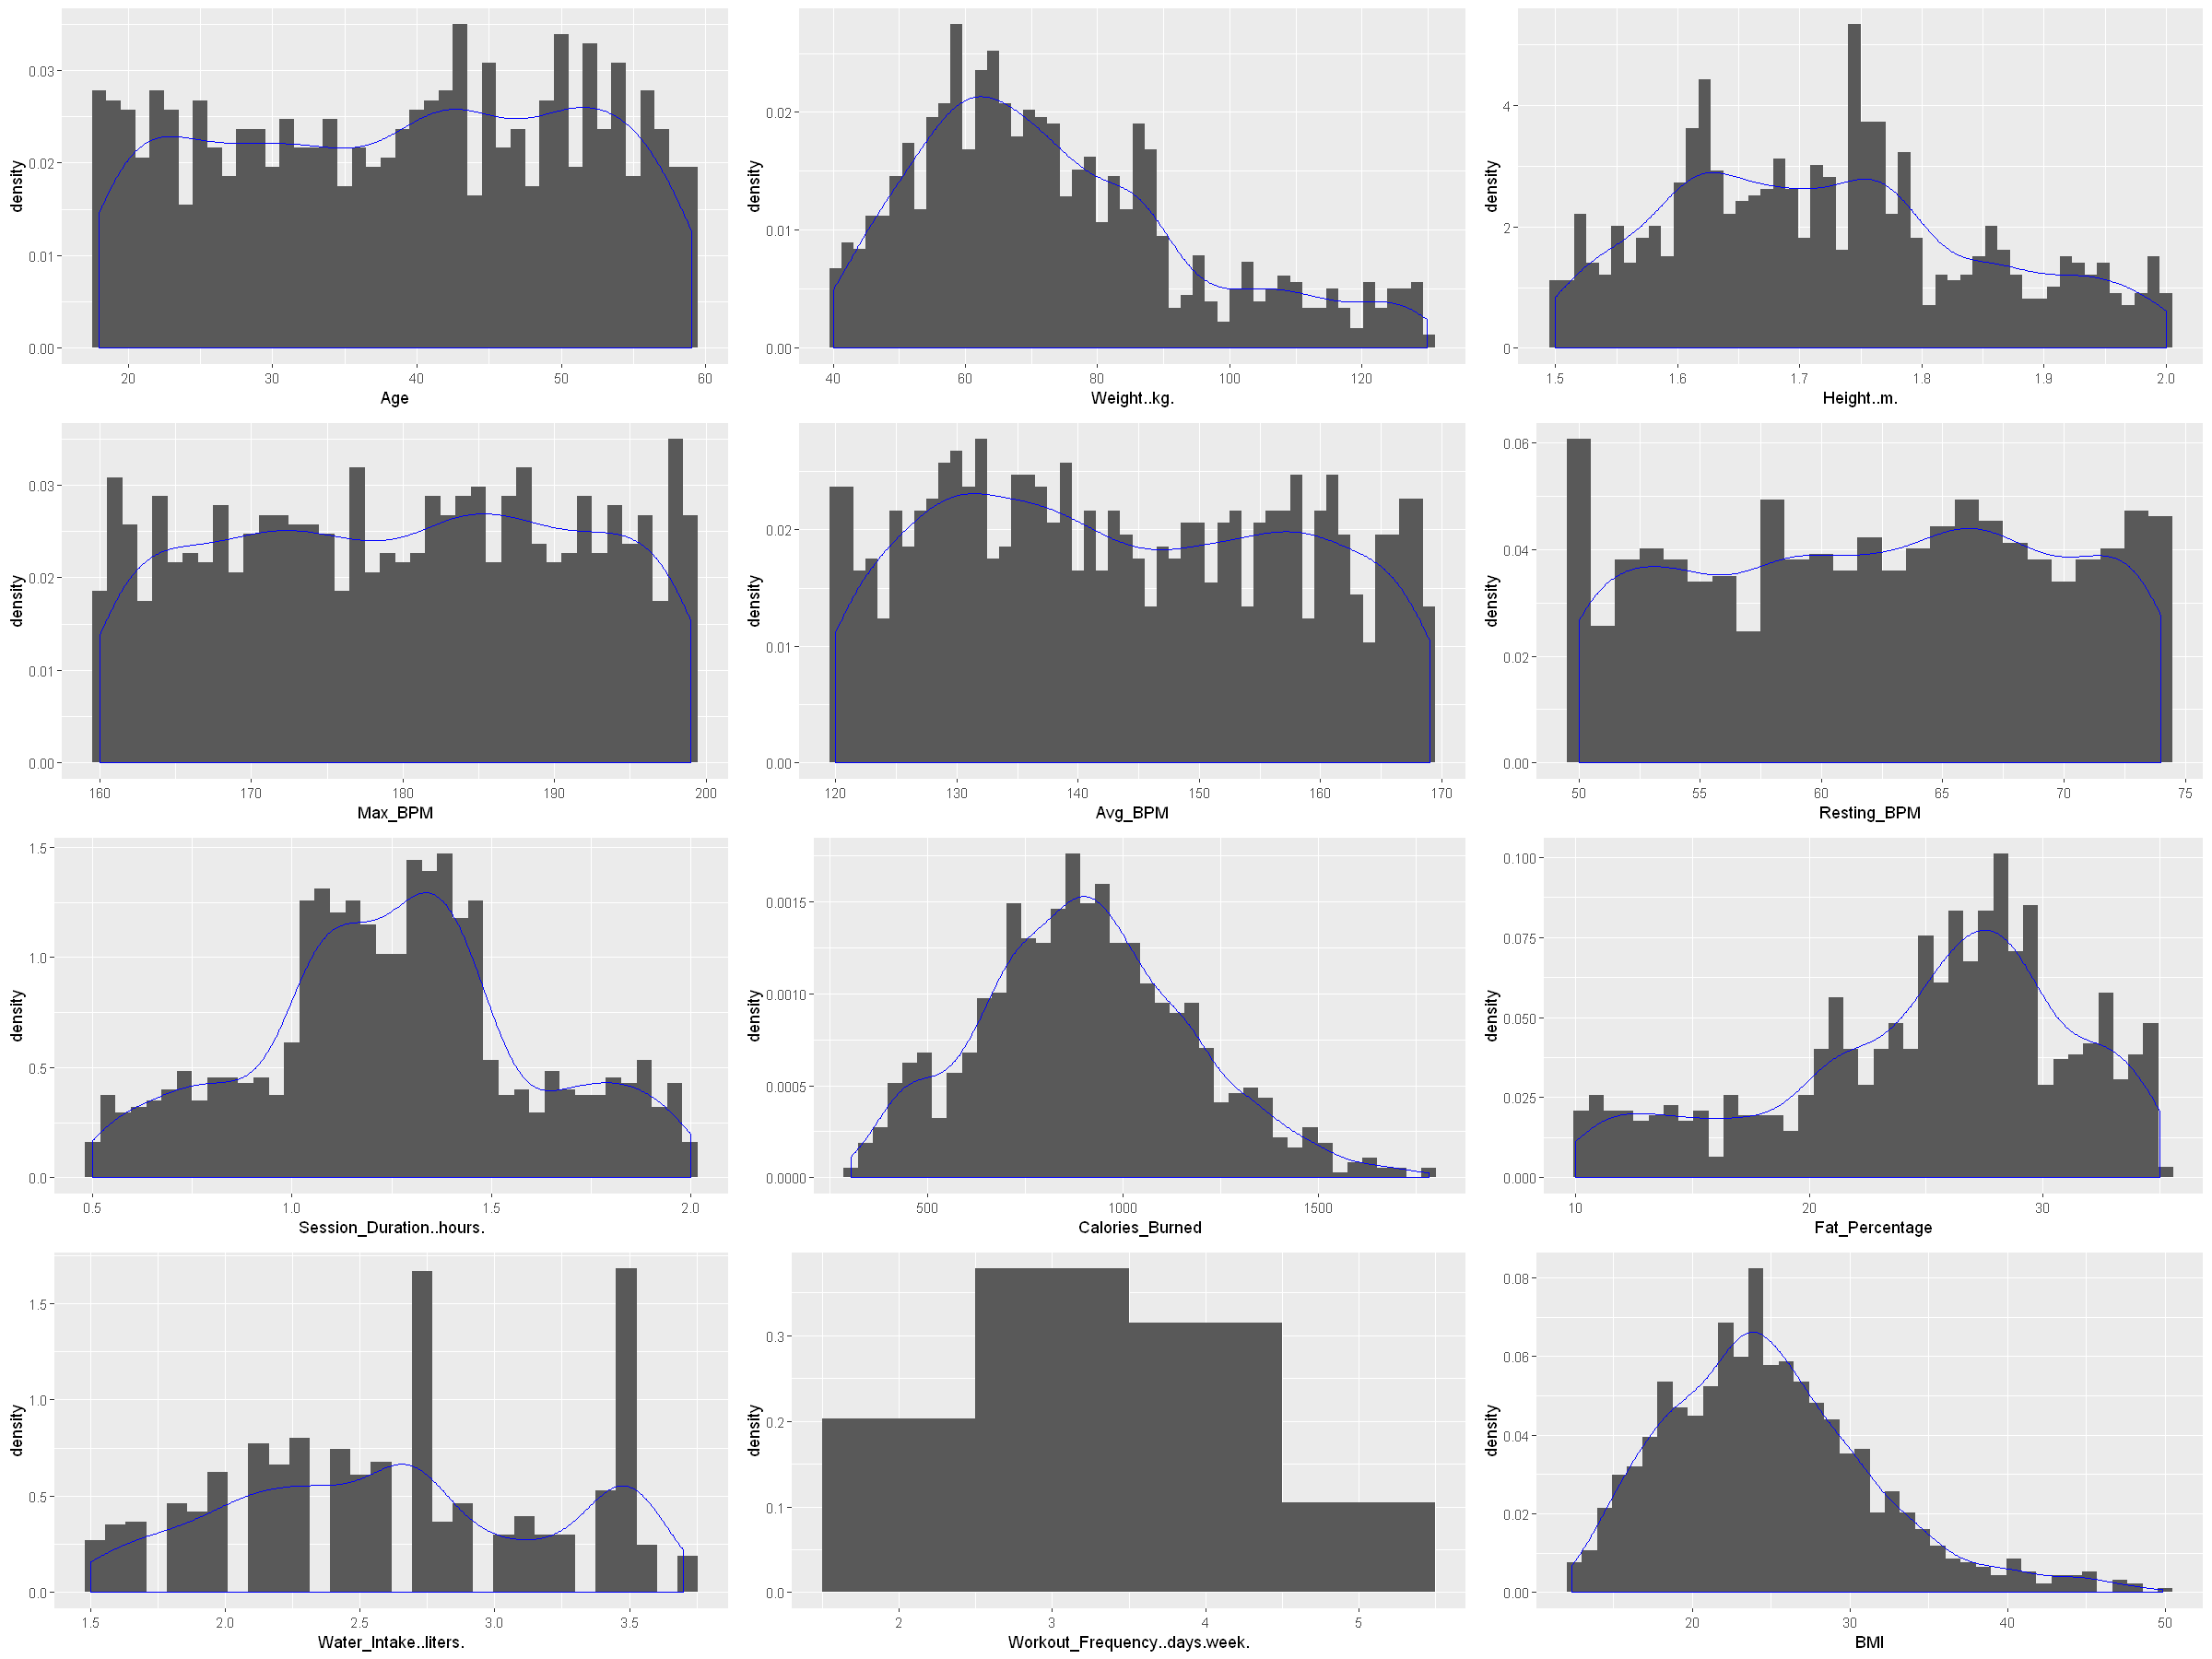

In [43]:
g1<-ggplot(gym,aes(x=Age))+geom_histogram(aes(y=..density..),bins=max(gym[,"Age"])-min(gym[,"Age"])+1)+geom_density(alpha=.2, col="blue") 
g2<-ggplot(gym,aes(x=Weight..kg.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g3<-ggplot(gym,aes(x=Height..m.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g4<-ggplot(gym,aes(x=Max_BPM))+geom_histogram(aes(y=..density..),bins=max(gym[,"Max_BPM"])-min(gym[,"Max_BPM"])+1)+geom_density(alpha=.2, col="blue") 
g5<-ggplot(gym,aes(x=Avg_BPM))+geom_histogram(aes(y=..density..),bins=max(gym[,"Avg_BPM"])-min(gym[,"Avg_BPM"])+1)+geom_density(alpha=.2, col="blue") 
g6<-ggplot(gym,aes(x=Resting_BPM))+geom_histogram(aes(y=..density..),bins=max(gym[,"Resting_BPM"])-min(gym[,"Resting_BPM"])+1)+geom_density(alpha=.2, col="blue")
g7<-ggplot(gym,aes(x=Session_Duration..hours.))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue")
g8<-ggplot(gym,aes(x=Calories_Burned))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue")
g9<-ggplot(gym,aes(x=Fat_Percentage))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue")
g10<-ggplot(gym,aes(x=Water_Intake..liters.))+geom_histogram(aes(y=..density..),bins=30)+geom_density(alpha=.2, col="blue")
g11<-ggplot(gym,aes(x=Workout_Frequency..days.week.))+geom_histogram(aes(y=..density..),bins=4)
g12<-ggplot(gym,aes(x=BMI))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue")


options(repr.plot.width=20, repr.plot.height=15)
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,ncol=3)

Tout d'abord, on observe que les variables $Age$ et celles sur les $BPM$ sont assez bien uniformément réparties et donc symétriques. Pour les variables $Session\_Duration..hours.$ et $Calories\_Burned$ on observe assez clairement une distribution gaussienne donc symétrique. Les variables $Weight$ , $Fat\_Percentage$ et $BMI$, semblent également gaussienne mais il y a un petit manque de symétrie à chaque fois, une transformation pourrait régler cela. Pour la variable $Height$, on observe plus une somme de deux gaussiennes mais pas symétrique, il faut trouver une transformation pour régler cela.
Pour la variable $ Water\_Intake$, on imagine la forme d'une gaussienne avec juste 2 valeurs beaucoup plus présentes que les autres, une transformation permettrait de faire mieux ressortir la gaussienne mais on ne pourra pas supprimer cet effet de valeurs sur-représentées.

In [44]:
gym[,"LWeight..kg."] <- log((gym[,"Weight..kg."]))
gym[,"LBMI"] <- log((gym[,"BMI"]))
gym[,"Fat_Percentage_S"] <- ((gym[,"Fat_Percentage"])/100)**2
gym[,"SHeight..m."] <-sqrt(gym[,"Height..m."])
gym[,"LWater_Intake..liters."] <-log(gym[,"Water_Intake..liters."])

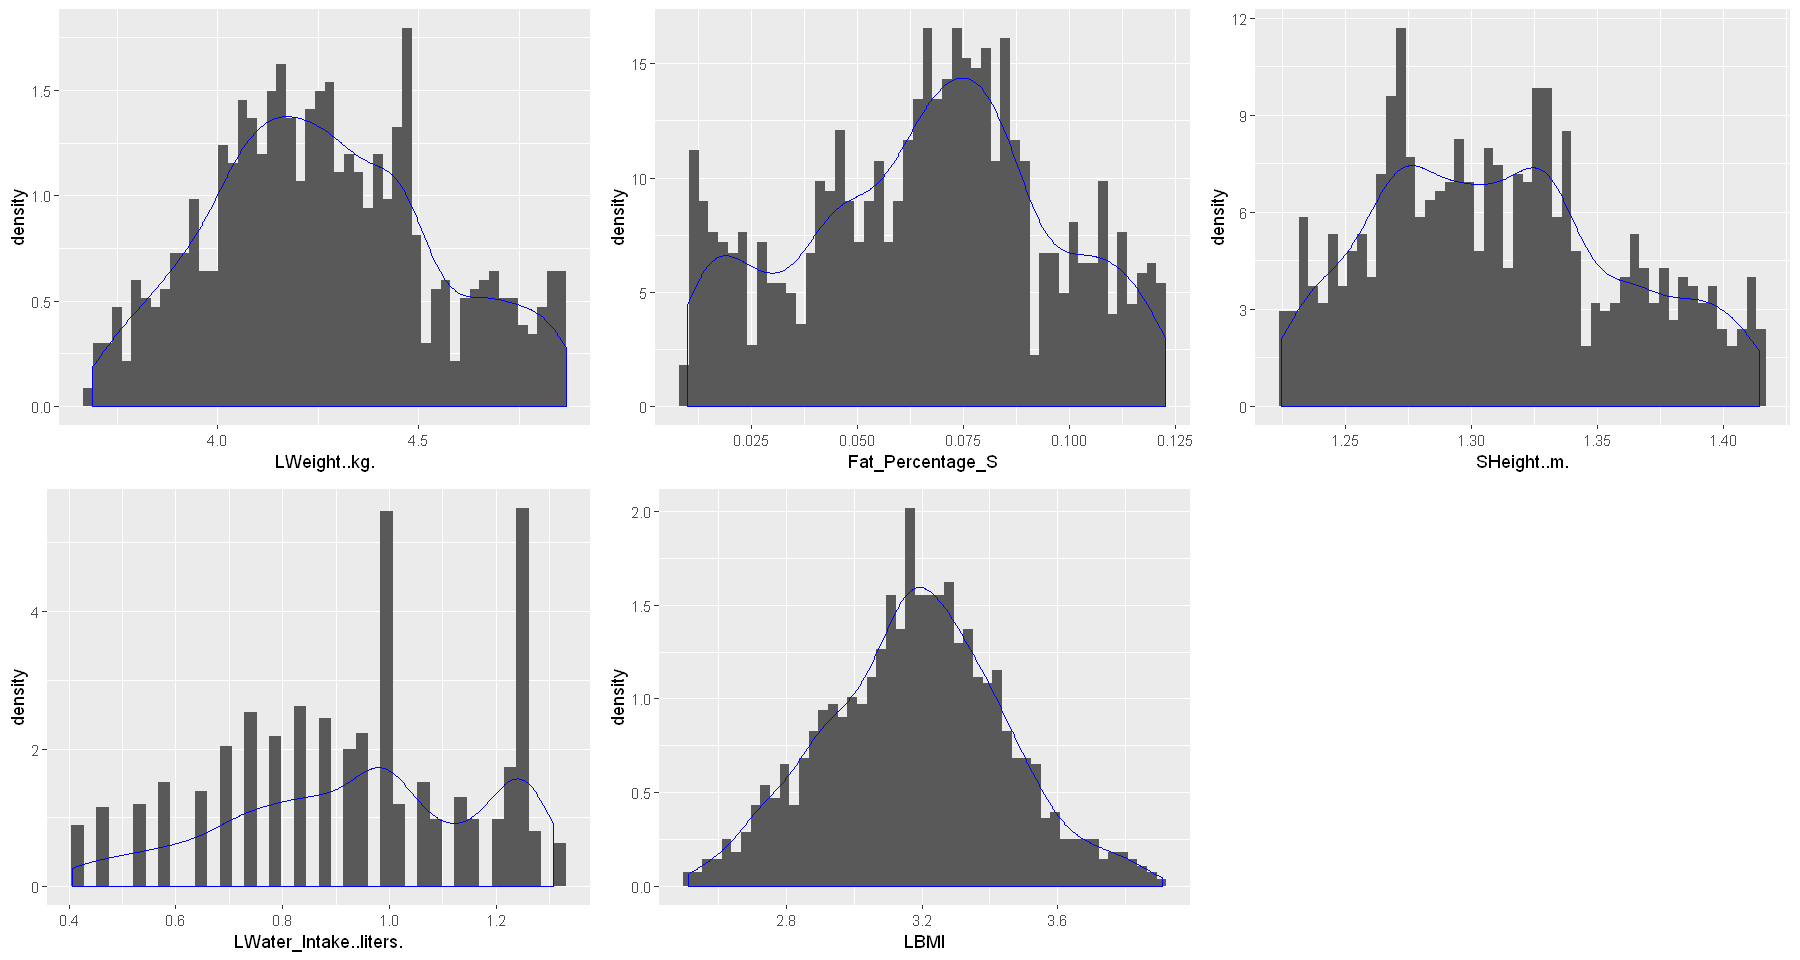

In [45]:
options(repr.plot.width=15, repr.plot.height=8)
g13<-ggplot(gym,aes(x=LWeight..kg.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g14<-ggplot(gym,aes(x=Fat_Percentage_S))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g15<-ggplot(gym,aes(x=SHeight..m.))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
g16<-ggplot(gym,aes(x=LWater_Intake..liters.))+geom_histogram(aes(y=..density..),bins=40)+geom_density(alpha=.2, col="blue") 
g17<-ggplot(gym,aes(x=LBMI))+geom_histogram(aes(y=..density..),bins=50)+geom_density(alpha=.2, col="blue") 
grid.arrange(g13,g14,g15,g16,g17,ncol=3)

On peut voir que pour certaines variables comme $BMI$ la transformation a permis de faire apparaître très distinctement la symétrie alors que pour d'autres le résultat est moins flagrant comme $Height$ mais toujours mieux que la variable de base. 

On va désormais retirer les variables initiales et conserver les variables transformées.

In [47]:
gym<-gym[,c(1:2,5:10,13:14,16:20)]
head(gym)

Age,Gender,Max_BPM,Avg_BPM,Resting_BPM,Session_Duration..hours.,Calories_Burned,Workout_Type,Workout_Frequency..days.week.,Experience_Level,LWeight..kg.,LBMI,Fat_Percentage_S,SHeight..m.,LWater_Intake..liters.
56,Male,180,157,60,1.69,1313,Yoga,4,3,4.480740,3.407842,0.015876,1.307670,1.2527630
46,Female,179,151,66,1.30,883,HIIT,4,2,4.316154,3.465736,0.114921,1.236932,0.7419373
32,Female,167,122,54,1.11,677,Cardio,4,2,4.220977,3.207208,0.111556,1.288410,0.8329091
25,Male,190,164,56,0.59,532,Strength,3,1,3.974058,2.912894,0.082944,1.303840,0.7419373
38,Male,188,158,68,0.64,556,Strength,3,1,3.830813,2.666534,0.085264,1.337909,1.0296194
56,Female,168,156,74,1.59,1116,HIIT,5,3,4.060443,3.022861,0.024025,1.296148,0.9932518


In [57]:
ggpairs(gym)

ERROR: Error in ggpairs(gym): impossible de trouver la fonction "ggpairs"
